In [130]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [188]:
mean_01 = np.array([1.5, 4.0])
mean_02 = np.array([-1.0, -1.0])

cov_01 = np.array([[1.0, 0.0], [0.0, 1.0]])
cov_02 = np.array([[0.9, 0.3], [0.3, 0.9]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 250)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 250)

print dist_01.shape
print dist_02.shape

(250, 2)
(250, 2)


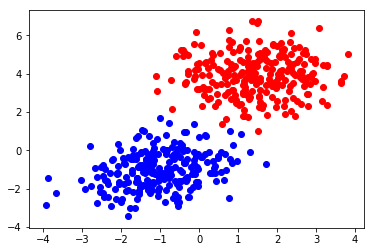

In [189]:
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],c='red')
plt.scatter(dist_02[:,0],dist_02[:,1],c='blue')
plt.show()

In [190]:
data = np.zeros((dist_01.shape[0] + dist_02.shape[0],dist_01.shape[1]+1))
data[:dist_01.shape[0],:dist_01.shape[1]] = dist_01
# 1 for red
data[:dist_01.shape[0],-1] = 1
# 0 for blue
data[dist_02.shape[0]:,:dist_02.shape[1]] = dist_02

np.random.shuffle(data)

print data.shape

(500, 3)


In [191]:
# 75% data for training and 25% for testing
split = int(0.8*data.shape[0])

X_train = data[:split,:-1]
Y_train = data[:split,-1]
# labels of test dataset is class 
X_test = data[split:,:-1]
Y_test = data[split:,-1]

print X_train.shape,Y_train.shape
print X_test.shape,Y_test.shape

(400, 2) (400,)
(100, 2) (100,)


In [181]:
# Logistic Regression 

def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

def hx(X,theta):
    return sigmoid(X.dot(theta))

def compute_loss_regression(X_train,Y_train,theta):
    loss = 0.0
    for ix in range(X_train.shape[0]):
        hQ = hx(X_train[ix],theta)
        loss += (-1.0*Y_train[ix]*np.log(hQ) - (1.0-Y_train[ix])*np.log(1-hQ))
    return loss


def compute_gradient_loss(X_train,Y_train,theta):
    n = X_train.shape[0]
    grads = np.zeros(theta.shape)

    for ix in range(n):
        gr = -1.0 * (Y_train[ix] - hx(X_train[ix],theta))*X_train[ix]
        grads += gr.reshape(theta.shape)
    return grads/n

def update_weights(X_train,Y_train,theta,alpha=0.1):
        grads = compute_gradient_loss(X_train,Y_train,theta)
        theta = theta - alpha*grads
        return theta

In [194]:
alpha = 0.1
theta = np.random.random((X_train.shape[1],1))
print theta
print theta.shape
print X_train[0].shape
print theta.shape
print X_train.shape

[[ 0.45917037]
 [ 0.43715134]]
(2, 1)
(2,)
(2, 1)
(400, 2)


In [195]:
all_loss = []
for ix in range(X_train.shape[0]):
    loss = compute_loss_regression(X_train,Y_train,theta)
    all_loss.append(loss)
    if ix%100 == 0:
        print "Error at Epoch {0}:".format(ix), loss
    theta = update_weights(X_train,Y_train,theta,alpha)

Error at Epoch 0: [ 97.38328839]
Error at Epoch 100: [ 48.32365504]
Error at Epoch 200: [ 44.42587096]
Error at Epoch 300: [ 43.00538016]


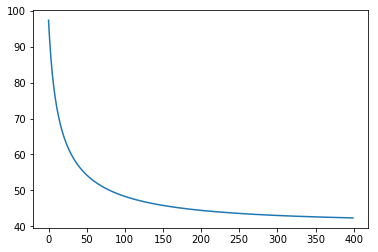

In [196]:
plt.figure(0)
plt.plot(all_loss)
plt.show()

In [197]:
for ix in range(50):  
    print hx(X_train[ix],theta),
    print Y_train[ix]

[ 0.99999521] 1.0
[ 0.51015673] 0.0
[ 0.00333025] 0.0
[ 0.99915272] 1.0
[ 0.01800566] 0.0
[ 0.0215975] 0.0
[ 0.74119373] 0.0
[ 0.00246104] 0.0
[ 0.04413974] 0.0
[ 0.99997066] 1.0
[ 0.02370727] 0.0
[ 0.99987083] 1.0
[ 0.32163299] 0.0
[ 0.99998655] 1.0
[ 0.02319569] 0.0
[ 0.96852757] 1.0
[ 0.17560376] 0.0
[ 0.99999193] 1.0
[ 0.03688567] 0.0
[ 0.00405549] 0.0
[ 0.37784578] 0.0
[ 0.99913248] 1.0
[ 0.06240352] 0.0
[ 0.99999377] 1.0
[ 0.02445058] 0.0
[ 0.99983015] 1.0
[ 0.02519908] 0.0
[ 0.06444718] 0.0
[ 0.00854416] 0.0
[ 0.99835488] 1.0
[ 0.99978308] 1.0
[ 0.9954871] 1.0
[ 0.3298124] 0.0
[ 0.99833223] 1.0
[ 0.99996955] 1.0
[ 0.99377403] 1.0
[ 0.17484235] 0.0
[ 0.00059774] 0.0
[ 0.97835068] 1.0
[ 0.18772821] 0.0
[ 0.9982259] 1.0
[ 0.97412766] 1.0
[ 0.0237419] 0.0
[ 0.99989705] 1.0
[ 0.03073848] 0.0
[ 0.05823282] 0.0
[ 0.99996665] 1.0
[ 0.99998038] 1.0
[ 0.02395704] 0.0
[ 0.99999762] 1.0
